In [1]:
%matplotlib inline

In [38]:
from numpy import *
from matplotlib.pyplot import *
from scipy.linalg import inv

In [3]:
# Load the data

data = loadtxt('data/data_train.csv', delimiter=',')

In [4]:
## (:, 0) = the week number
## (:, 1) = the average measured temperature
## (:, 2) = soil moisture
## (:, 3) = the number of new cells (known as tracheids)

In [5]:
# Prepare the data

X = data[:,0:-1]
y = data[:,-1]

In [50]:
X.shape, y.shape

((159, 3), (159,))

(array([  6.,   4.,  15.,  17.,  25.,  15.,  12.,  26.,  22.,  17.]),
 array([ -4.89 ,  -2.282,   0.326,   2.934,   5.542,   8.15 ,  10.758,
         13.366,  15.974,  18.582,  21.19 ]),
 <a list of 10 Patch objects>)

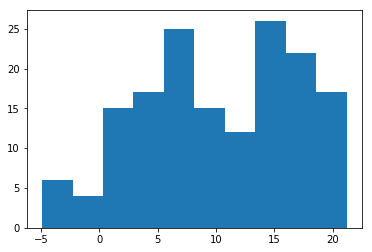

In [7]:
# Inspect the data

figure()
hist(X[:,1], 10)

Text(0,0.5,'x2')

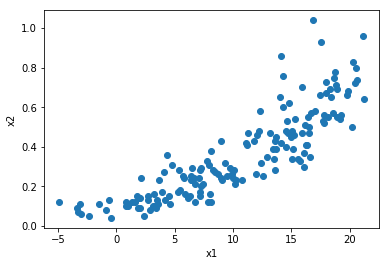

In [8]:
# <TASK 1>

figure()
plot(X[:,1],X[:,2], 'o')
xlabel('x1')
ylabel('x2')

(array([ 30.,  31.,  24.,  20.,  18.,  14.,  13.,   5.,   2.,   2.]),
 array([ 0.04,  0.14,  0.24,  0.34,  0.44,  0.54,  0.64,  0.74,  0.84,
         0.94,  1.04]),
 <a list of 10 Patch objects>)

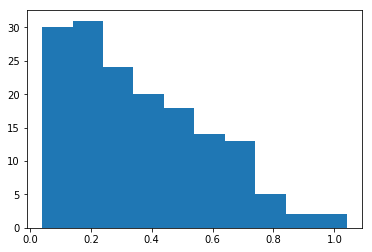

In [9]:
## SB
figure()
hist(X[:, 2])

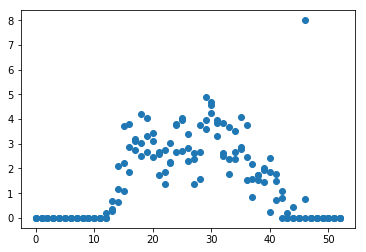

In [51]:
## SB
figure()
plot(X[:, 0], y, 'o')

In [11]:
mean(X, axis=0)

array([ 26.        ,  10.23025157,   0.35798742])

In [54]:
# Standardization
X[:, 1:3] = ((X - X.mean(axis=0)) / std(X.std(axis=0)))[:, 1:3] 
X.shape
X[:, 0]

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,   0.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,   0.,   1.,   2.,   3.,
         4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
        15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,
        26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        37.,  38.,  39.,  40.,  41.,  42.,  43.,  4

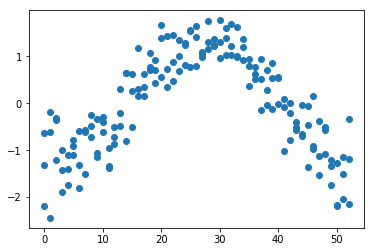

In [13]:
# <TASK 2> 
## SB, show ? show if it is normalized
## week vs Temp.
figure()
plot(X[:, 0], X[:, 1], 'o');

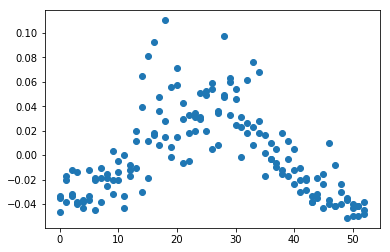

In [47]:
## SB, show if it is normalized
figure()
plot(X[:, 0], X[:, 2], 'o');

In [16]:
# <TASK 2>

# Feature creation

from tools import poly_exp
Z = poly_exp(X,2) ## stacking as described in pdf.

Z = column_stack([ones(len(Z)), Z]) ## numpy.column_stack(), add ones column at [:, 0]

# Building a model



In [35]:
Z.shape # (159, 3) -> (159, 6) -> (159, 7)

(159, 7)

In [72]:
# <TASK 3>
## implement ordinary least squares in Python using the 'dot' function in NumPy
Z.transpose().shape

w = dot(  dot( inv(dot(Z.transpose(), Z)), Z.transpose() ), y  )
## SB,  (7 by 159 * 159 by 7) * 7 by 159 = (7 by 159) * (159 by 1) = w(7 by 1) 
w.shape
# Evaluation 
w
#y_pred = dot(Z_test,w)



array([ -2.50763575e-01,   1.57969583e-01,   6.55672899e-01,
         8.61080175e-01,  -2.89057418e-03,   2.15998221e-01,
         2.39065160e+01])

In [66]:
# <TASK 4> Load and preprocess the test data
#######################################################
## Load the data
data_test = loadtxt('data/data_test.csv', delimiter=',')

# Prepare the data
X_test = data_test[:,0:-1]
y_test = data_test[:,-1]

## Preprocess the test data
# Standardization
X_test[:, 1:3] = ((X_test - X_test.mean(axis=0)) / std(X_test.std(axis=0)))[:, 1:3] 

# <TASK 2>

# Feature creation

from tools import poly_exp
Z_test = poly_exp(X_test,2) ## stacking as described in pdf.

Z_test = column_stack([ones(len(Z_test)), Z_test]) ## numpy.column_stack(), add ones column at [:, 0]
print('Z_test.shape', Z_test.shape)
 
#######################################################
from tools import MSE



Z_test.shape (53, 7)


In [71]:
# <TASK 5> implement the MSE calculation
y_pred = dot(Z_test, w)
## SB,     (53 by 7) * (7 by 1) = 53 by 1
print('y_pred.shape', y_pred.shape,
      'y_test.shape', y_test.shape)

mse = MSE(y_test, y_pred)
print('mse.shape', mse.shape)
print(mse)

y_pred.shape (53,) y_test.shape (53,)
mse.shape ()
0.757313738814


In [ ]:
# <TASK 6>


# Notes:

## Task 7

The results found up until Task 6 are given in the Lab Description. Results after removing the outlier (Task 7) are:

w =  [ 1.838  0.069  0.669  0.185 -0.63   0.28  -0.043]
MSE on test data   0.509881463006
MSE baseline       1.72845474467

Replacing the outlier with 0 can be achieved by either using the line commented at the beginning of the file main.py, 
#y[y >= 8] = 0       # <-- Task 7 data cleaning
or by manual replacement in the data file (the outlier is at line 47).

Regarding the second part of Task 7: it is easy to achieve even better results by, e.g., changing from degree '2' to '3' in the call to poly_exp: 

MSE on test data   0.444276226552
MSE baseline       1.72845474467

## Task 8

Since Task 8 requires refactorization of some of the code, a possible solution is provided separately: in main_bonus.py



In [ ]:
# <TASK 7>



In [ ]:
# <TASK 8: You will need to make changes from '# Feature creation'
#          To get the exact results, you will need to reverse the second part of Task 7 (your own modifications)>
